# Loan Data (from Prosper) Exploration

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

* This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1664203594297786&usg=AOvVaw1M4pBR3jcCIzQ0W1t2kisP) explains the variables in the data set.
* You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[unicodedecodeerror-utf-8-codec-while-reading-a-csv-file](https://stackoverflow.com/questions/33819557/unicodedecodeerror-utf-8-codec-while-reading-a-csv-file)

In [2]:
prosperLoanData = pd.read_csv('prosperLoanData.csv', encoding='utf-8', engine='python')

We need to expand the number of displayable columns so it fits the number of columns of the DataFrame which is 81.

[how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe](https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe)

In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 81)
#pd.set_option('display.width', 1000)

In [4]:
prosperLoanData.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# Getting basic informations about the dataset
prosperLoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is/are the main feature(s) of interest in your dataset?

I don't know now but I expect to find out what features can explain loans interest.

What factors affect a loan’s outcome status?


What affects the borrower’s APR or interest rate?


Are there differences between loans depending on how large the original loan amount was?

## Univariate Exploration of Data

### Question 1: What is the trend of the `LoanStatus` variable ?

We'll start looking at the trend of the `LoanStatus`  variable.

`LoanStatus` : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

In [6]:
def special_barplot(data, colname):
    # Getting order from the greatest to the lowest
    prosperLoanData = data
    col_name = colname
    
    type_counts = prosperLoanData[col_name].value_counts()
    order = type_counts.index
    n_total = type_counts.sum()
    color = sns.color_palette()[0]
    plt.figure(figsize = (15, 10))
    f = sns.countplot(data=prosperLoanData, y=col_name, order=order, color=color);
    try:
        for index in range(type_counts.shape[0]):
            count = type_counts[index]
            percent_str = f'{100 * count / n_total:0.2f}%'
            plt.text(x=count+3, y=index, s=percent_str, va='center', fontdict={'fontsize': 15});

        xticks = list(type_counts.values)[::-1]
        #print(xticks)
        xlabels = [f'{elt:0.1f}' for elt in xticks]
        yticks = list(type_counts.index)
        #print(yticks)
        ylabels = [f'{elt}' for elt in yticks]
        #plt.xticks(ticks=xticks, labels=xlabels, rotation=30)
        plt.yticks(ticks=np.arange(len(yticks)), labels=ylabels, rotation=60)
    except Exception as e :
        #print(e)
        pass        

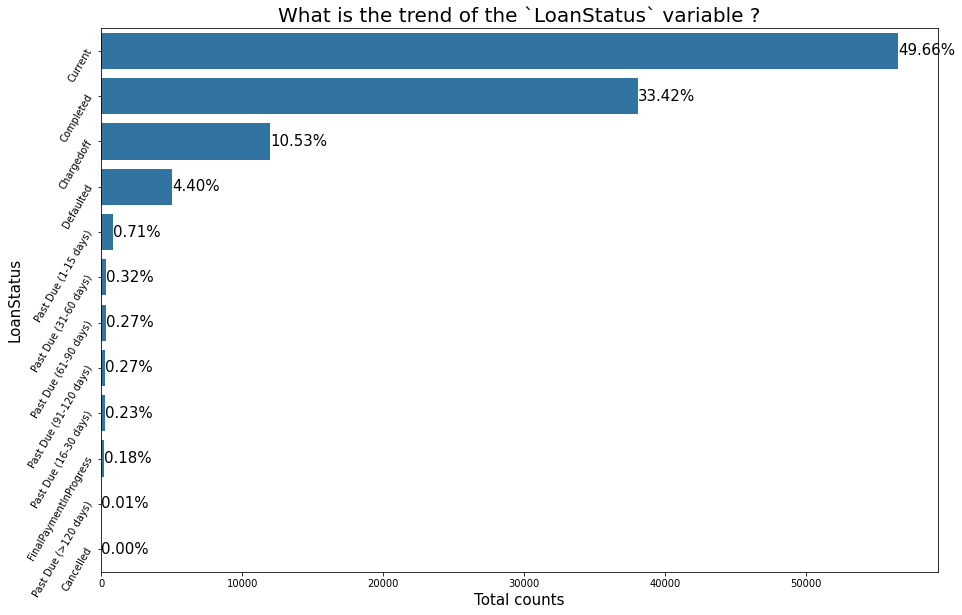

In [7]:
special_barplot(data=prosperLoanData, colname='LoanStatus')
#f.set_xticklabels(labels = list(type_counts.values), minor=True, rotation=360)
plt.title('What is the trend of the `LoanStatus` variable ?', fontdict={'fontsize': 20});
plt.xlabel(xlabel='Total counts', fontdict={'fontsize': 15});
plt.ylabel(ylabel='LoanStatus', fontdict={'fontsize': 15});

As we can see, most of the loans are ongoing `49.66%`, some are already completed `33.42%` and the less are chargedoff `10.53%`. All the other statuses are not so relevant because they have little percentages.

### Question 2: What The most used `CreditGrade` ?

`CreditGrade` : The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.


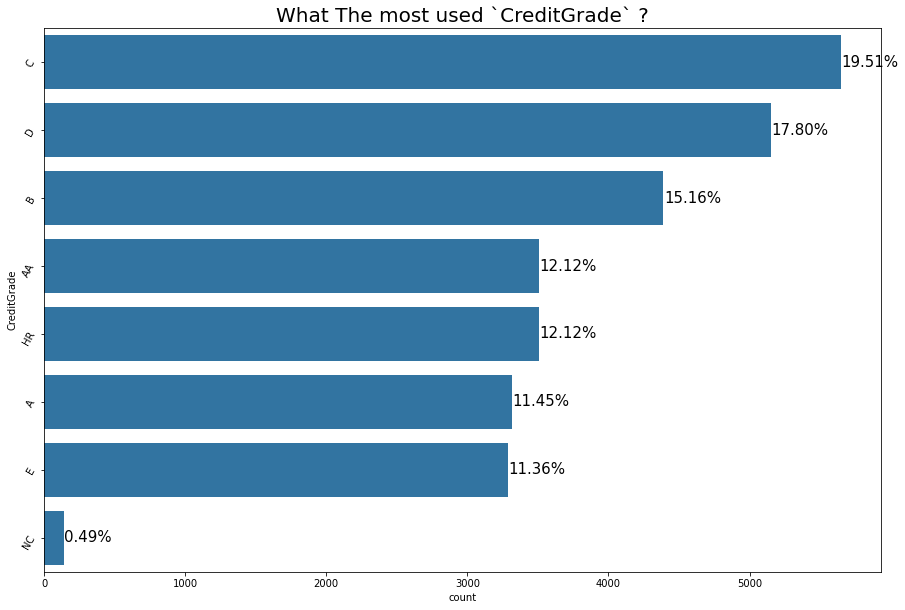

In [8]:
special_barplot(data=prosperLoanData, colname='CreditGrade');
plt.title('What The most used `CreditGrade` ?', fontdict={'fontsize': 20});

* The grade `C` is the most represented with `19.51%`
* The grade `D` is the second most represented with `17.80%`
* The grade `B` is the third most represented with `15.16%`

### Question 3: The most contracted loan `Term` ?

`Term` : The length of the loan expressed in months.


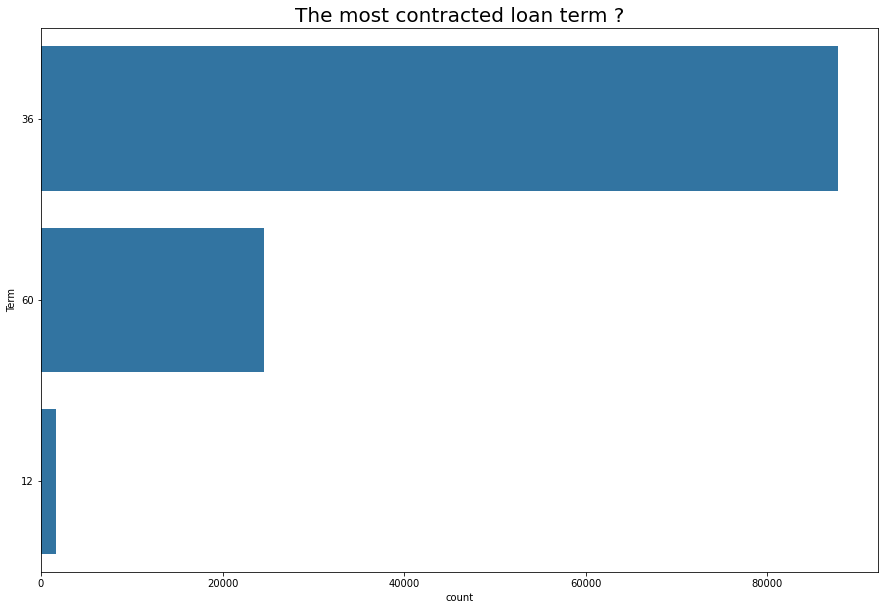

In [9]:
special_barplot(data=prosperLoanData, colname='Term');
plt.title('The most contracted loan term ?', fontdict={'fontsize': 20});

The most contracted loan term is the length of `36 months` with more than 80000 contracts.

### Question 4: BorrowerAPR distribution

`BorrowerAPR` : The Borrower's Annual Percentage Rate (APR) for the loan.

In [10]:
prosperLoanData['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

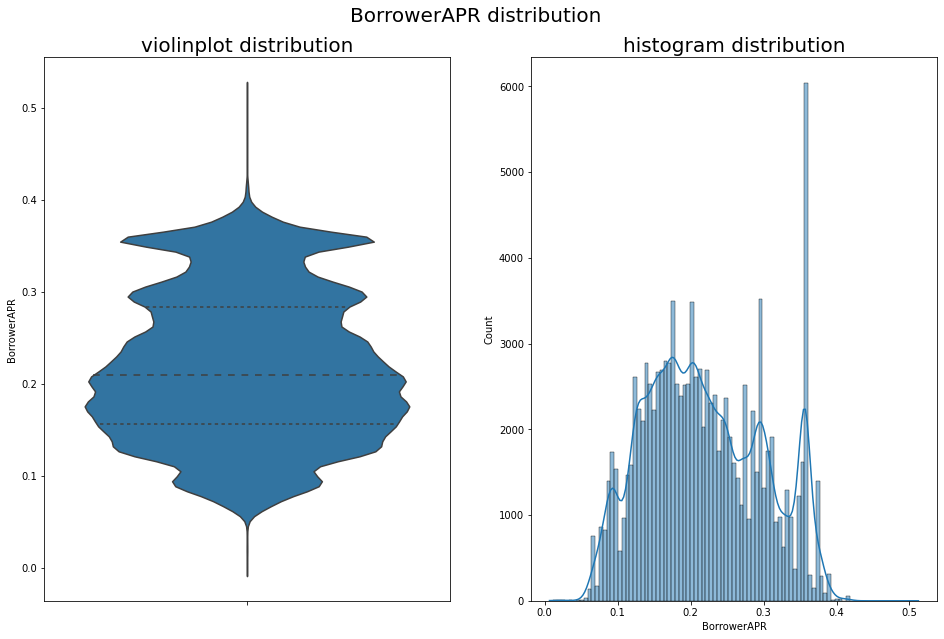

In [108]:
plt.figure(figsize = (16, 10));
plt.suptitle('BorrowerAPR distribution', x=0.5, y=0.95, fontproperties={'size': 20});
plt.subplot(1, 2, 1)
sns.violinplot(data=prosperLoanData, y='BorrowerAPR', inner='quartile');
plt.title('violinplot distribution', fontdict={'fontsize': 20});
plt.subplot(1, 2, 2)
sns.histplot(data=prosperLoanData, x='BorrowerAPR', kde=True);
plt.title('histogram distribution', fontdict={'fontsize': 20});

- The distribution is slightly normal

- With a standard deviation of `0.080364` the median value of the BorrowerAPR is `0.209760` and it is closest to the mean `0.218828`. It means that the BorrowerAPR is really good for loans.

### Question 5: What is the best ProsperRating ?

`ProsperRating (Alpha)` : The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

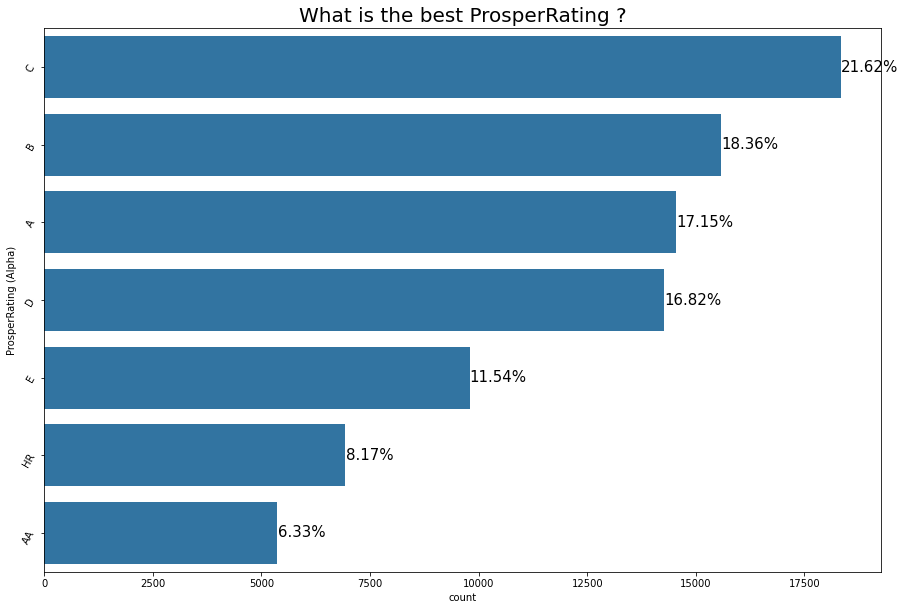

In [12]:
special_barplot(data=prosperLoanData, colname='ProsperRating (Alpha)');
plt.title('What is the best ProsperRating ?', fontdict={'fontsize': 20});

The best ProsperRating is 
* The grade `C` is the most represented with `21.62%` and followed by
* The grade `B` is the second most represented with `18.36%` and followed by
* The grade `A` is the third most represented with `17.15%`

### Question 6: `ProsperScore` distribution

`ProsperScore` : A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

In [13]:
prosperLoanData['ProsperScore'].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

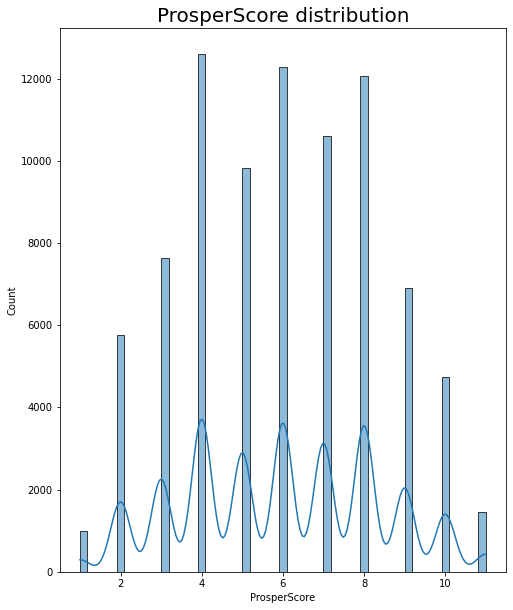

In [14]:
plt.figure(figsize = (8, 10));
sns.histplot(data=prosperLoanData, x='ProsperScore', kde=True);
plt.title('ProsperScore distribution', fontdict={'fontsize': 20});

The most highest `ProsperScore` are `4` then `6` then `8`. More than 12000 loans are relataed to houses with such ProsperScore.

### Question 7: `ListingCategory` distribution

`ListingCategory` : The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [15]:
prosperLoanData['ListingCategory (numeric)'].describe()

count    113937.000000
mean          2.774209
std           3.996797
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          20.000000
Name: ListingCategory (numeric), dtype: float64

In [16]:
# Creating a dict for ListingCategory
ListingCategoryDict ={0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

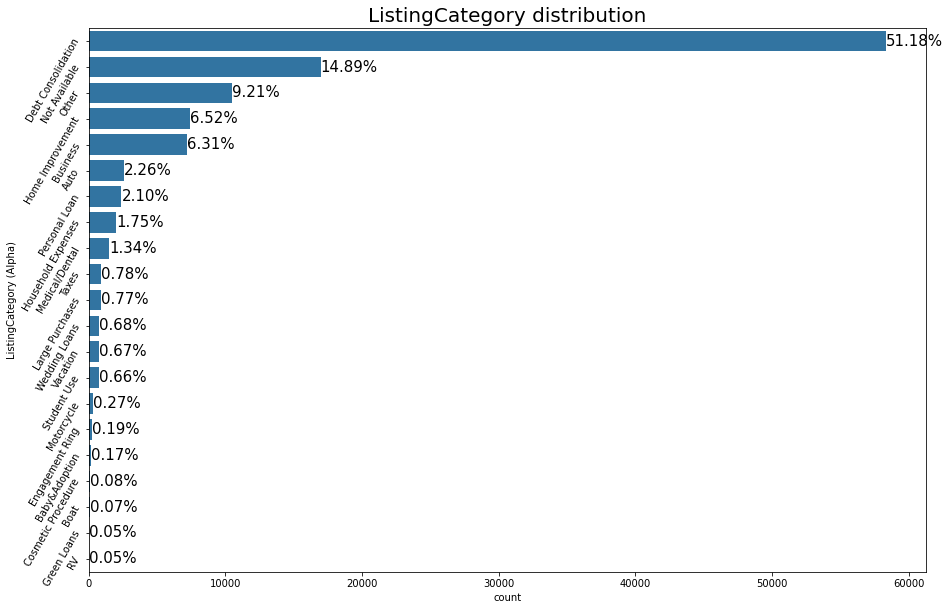

In [20]:
#plt.figure(figsize = (8, 10));
# Creating a variable for coresponding listing category numbers to their meaning.
prosperLoanData['ListingCategory (Alpha)'] = prosperLoanData['ListingCategory (numeric)'].apply(lambda val: ListingCategoryDict[val]);
special_barplot(data=prosperLoanData, colname='ListingCategory (Alpha)');
plt.title('ListingCategory distribution', fontdict={'fontsize': 20});

Most of the loans are for `Debt Consolidation`. Really inspiring.

### Question 8: `Investors` distribution

`Investors` : The number of investors that funded the loan.

In [36]:
prosperLoanData['Investors'].value_counts().nlargest(5)

1    27814
2     1386
3      991
4      827
5      753
Name: Investors, dtype: int64

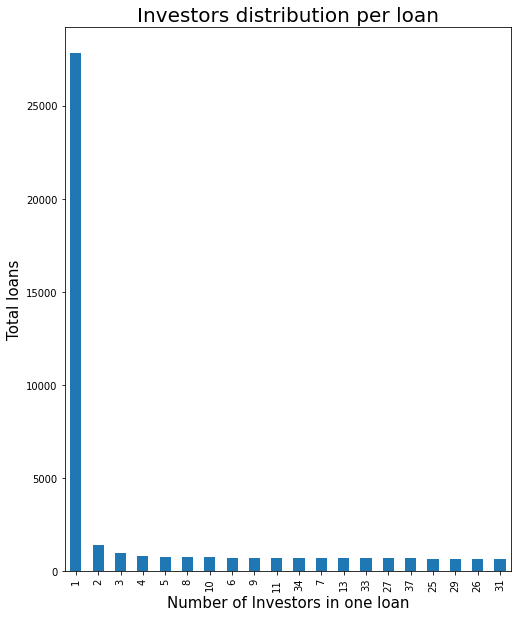

In [35]:
plt.figure(figsize = (8, 10));
prosperLoanData['Investors'].value_counts().nlargest(20).plot(kind='bar');
plt.title('Investors distribution per loan', fontdict={'fontsize': 20});
plt.xlabel(xlabel='Number of Investors in one loan', fontdict={'fontsize': 15});
plt.ylabel(ylabel='Total loans', fontdict={'fontsize': 15});

Almost all loans are funded by one investor. (More than 25000 loans.)

### Question 9: `EmploymentStatus`, `Occupation`, `EmploymentStatusDuration` and `IsBorrowerHomeowner` distribution

`EmploymentStatus` : The employment status of the borrower at the time they posted the listing.

`Occupation` : The Occupation selected by the Borrower at the time they created the listing.

`EmploymentStatusDuration` : The length in months of the employment status at the time the listing was created.

`IsBorrowerHomeowner` : A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

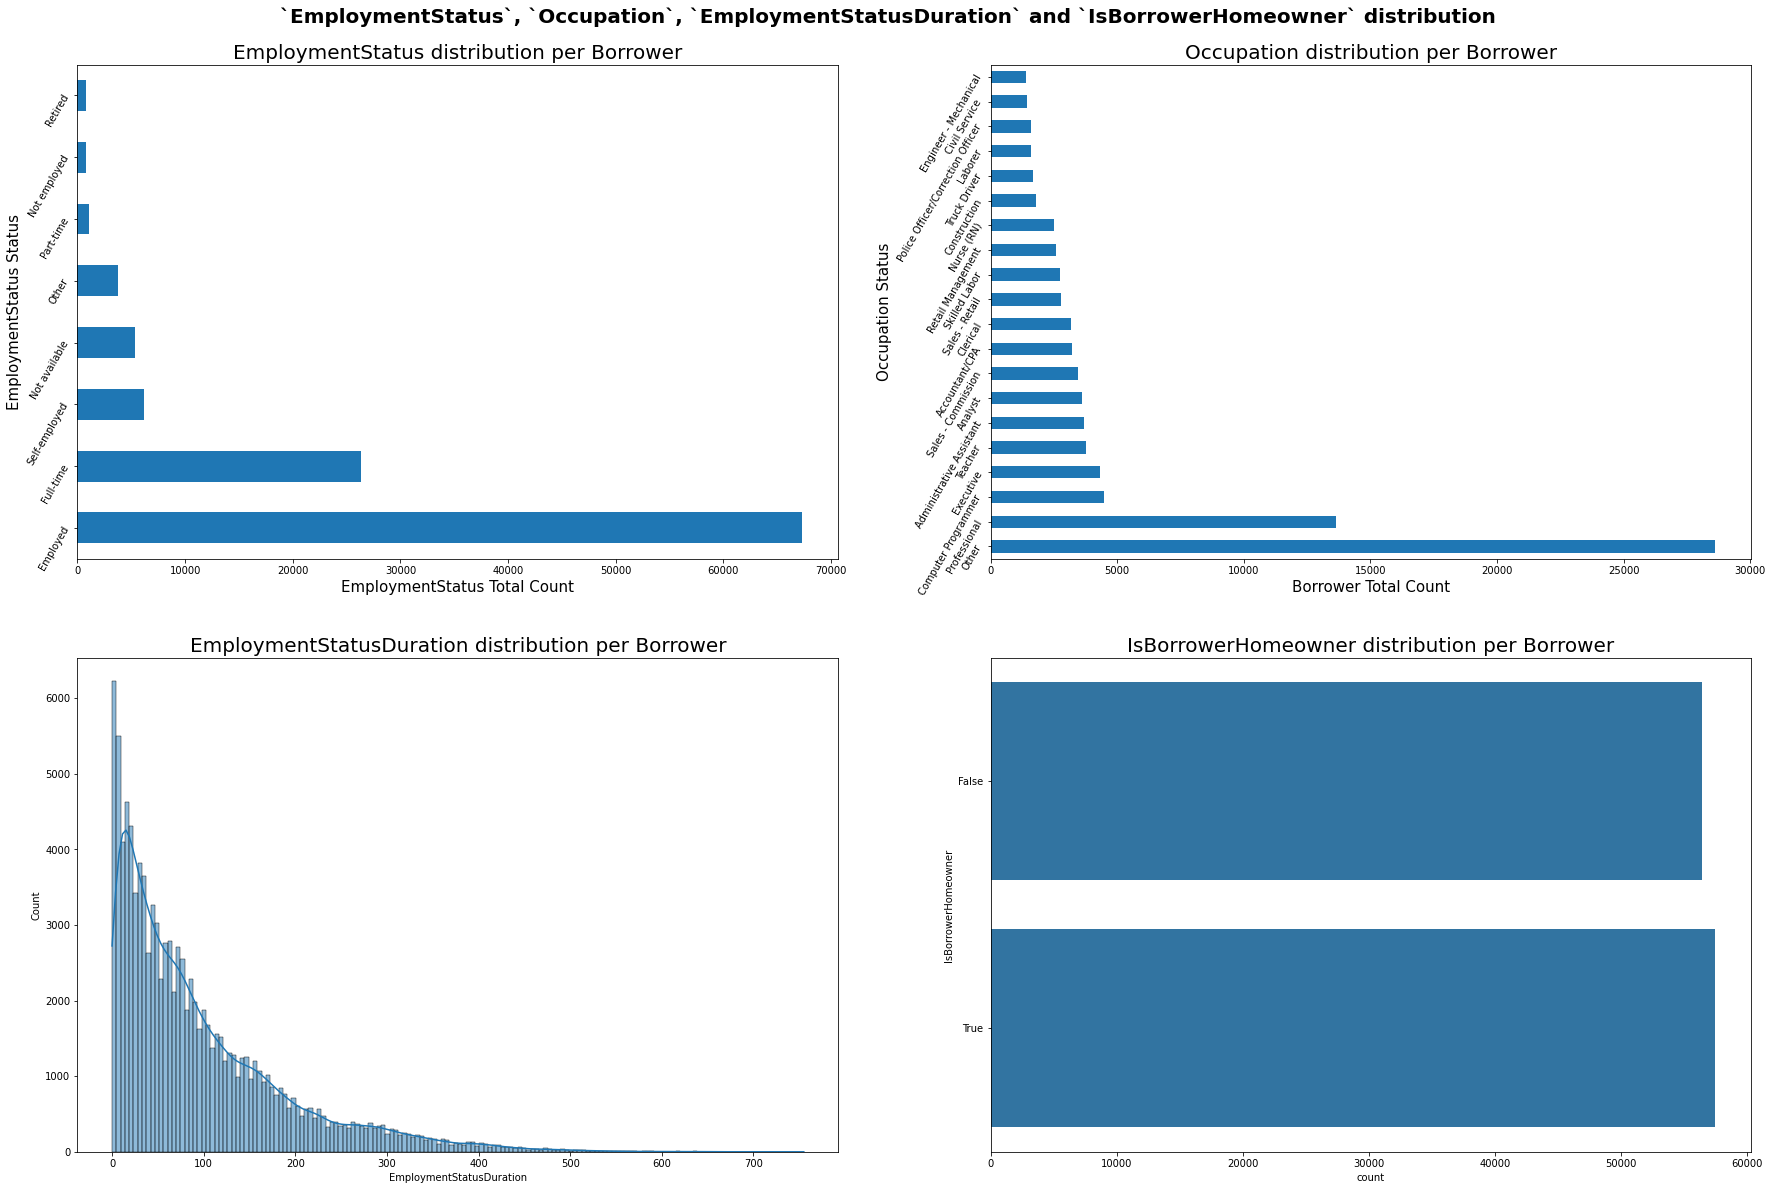

In [77]:
plt.figure(figsize = (30, 20));
plt.suptitle('`EmploymentStatus`, `Occupation`, `EmploymentStatusDuration` and `IsBorrowerHomeowner` distribution', fontsize=20, fontweight='bold', x=0.5, y=0.92)

plt.subplot(2, 2, 1)
prosperLoanData['EmploymentStatus'].value_counts().nlargest(20).plot(kind='barh');
plt.title('EmploymentStatus distribution per Borrower', fontdict={'fontsize': 20});
plt.xlabel(xlabel='EmploymentStatus Total Count', fontdict={'fontsize': 15});
plt.ylabel(ylabel='EmploymentStatus Status', fontdict={'fontsize': 15});
plt.yticks(rotation=60);

plt.subplot(2, 2, 2)
prosperLoanData['Occupation'].value_counts().nlargest(20).plot(kind='barh');
plt.title('Occupation distribution per Borrower', fontdict={'fontsize': 20});
plt.xlabel(xlabel='Borrower Total Count', fontdict={'fontsize': 15});
plt.ylabel(ylabel='Occupation Status', fontdict={'fontsize': 15});
plt.yticks(rotation=60);

plt.subplot(2, 2, 3)
sns.histplot(data=prosperLoanData, x='EmploymentStatusDuration', kde=True);
plt.title('EmploymentStatusDuration distribution per Borrower', fontdict={'fontsize': 20});

plt.subplot(2, 2, 4);
sns.countplot(data=prosperLoanData, y='IsBorrowerHomeowner', color=sns.color_palette()[0]);
plt.title('IsBorrowerHomeowner distribution per Borrower', fontdict={'fontsize': 20});

- Most of the Borrowers are employed(Employed, Full-time or Self-employed)

- Most of the Borrowers don't specify their Occupations.

    * More than `10000` Borrowers are `Professionals`

    * Around `5000` Borrowers are `Computer Programmer` and `Executive`

    * Around `4000` Borrowers are `Teacher`,  `Administrative Assistant` and `Analyst`

- Around `50%` of Borrowers are either Homeowners or not Homeowners.

- Looks like there needs to be an employee for some time (about 100 months) in order to the a borrower, assuming your employement come with high revenues. (to be able to be Homeowner.)

### Question 10: `IncomeRange` distribution

`IncomeRange` : The income range of the borrower at the time the listing was created.

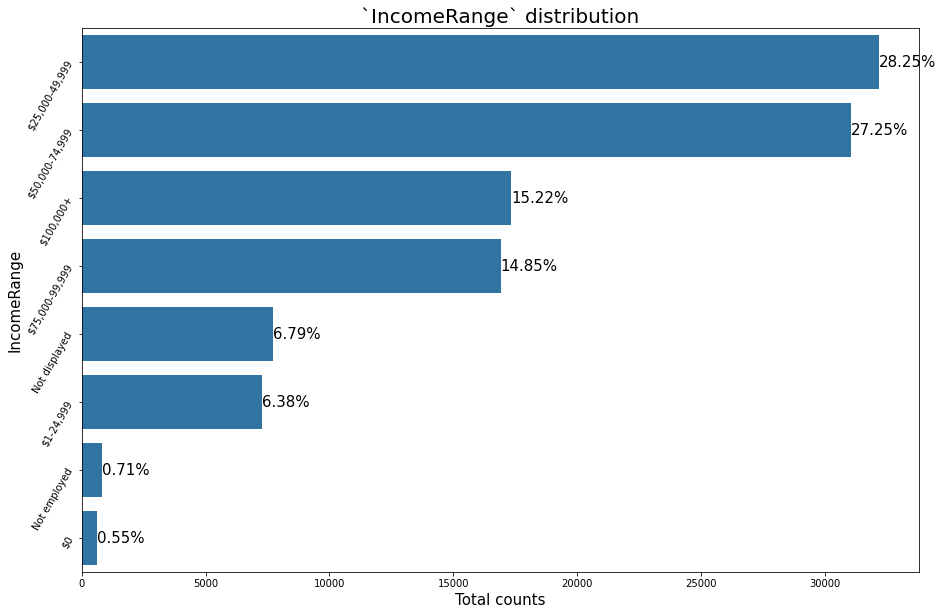

In [94]:
special_barplot(data=prosperLoanData, colname='IncomeRange')
#f.set_xticklabels(labels = list(type_counts.values), minor=True, rotation=360)
plt.title('`IncomeRange` distribution', fontdict={'fontsize': 20});
plt.xlabel(xlabel='Total counts', fontdict={'fontsize': 15});
plt.ylabel(ylabel='IncomeRange', fontdict={'fontsize': 15});

- Clearly you must have a minimum `IncomeRange` of `$25,000` to be sure to have a loan.

### Univariate Exploration Summary

#### Question 1: What is the trend of the `LoanStatus` variable ?
- As we can see, most of the loans are ongoing `49.66%`, some are already completed `33.42%` and the less are chargedoff `10.53%`. All the other statuses are not so relevant because they have little percentages.

#### Question 2: What The most used `CreditGrade` ?
* The grade `C` is the most represented with `19.51%`
* The grade `D` is the second most represented with `17.80%`
* The grade `B` is the third most represented with `15.16%`

#### Question 3: The most contracted loan `Term` ?
- The most contracted loan term is the length of `36 months` with more than 80000 contracts.

#### Question 4: BorrowerAPR distribution
- The distribution is slightly normal

- With a standard deviation of `0.080364` the median value of the BorrowerAPR is `0.209760` and it is closest to the mean `0.218828`. It means that the BorrowerAPR is really good for loans.

#### Question 5: What is the best ProsperRating ?
The best ProsperRating is 
* The grade `C` is the most represented with `21.62%` and followed by
* The grade `B` is the second most represented with `18.36%` and followed by
* The grade `A` is the third most represented with `17.15%`

#### Question 6: `ProsperScore` distribution
- The most highest `ProsperScore` are `4` then `6` then `8`. More than 12000 loans are relataed to houses with such ProsperScore.

#### Question 7: `ListingCategory` distribution
- Most of the loans are for `Debt Consolidation`. Really inspiring.

#### Question 8: `Investors` distribution
- Almost all loans are funded by one investor. (More than 25000 loans.)

#### Question 9: `EmploymentStatus`, `Occupation`, `EmploymentStatusDuration` and `IsBorrowerHomeowner` distribution
- Most of the Borrowers are employed(Employed, Full-time or Self-employed)

- Most of the Borrowers don't specify their Occupations.

    * More than `10000` Borrowers are `Professionals`

    * Around `5000` Borrowers are `Computer Programmer` and `Executive`

    * Around `4000` Borrowers are `Teacher`,  `Administrative Assistant` and `Analyst`

- Around `50%` of Borrowers are either Homeowners or not Homeowners.

- Looks like there needs to be an employee for some time (about 100 months) in order to the a borrower, assuming your employement come with high revenues. (to be able to be Homeowner.)

#### Question 10: `IncomeRange` distribution
- Clearly you must have a minimum `IncomeRange` of `$25,000` to be sure to have a loan.

## Bivariate Exploration of Data

BorrowerAPR and BorrowerState

BorrowerRate and Term

BorrowerState ProsperScore

ProsperRating ProsperScore

ProsperRating EstimatedReturn

LoanDuration BorrowerState

ProsperRating EstimatedReturn BorrowerState

ProsperScore EstimatedReturn BorrowerState

ProsperRating BorrowerState ProsperScore

### Question 1: Relationship between `BorrowerAPR` and `BorrowerState`

`BorrowerAPR` : The Borrower's Annual Percentage Rate (APR) for the loan.

`BorrowerState` : The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

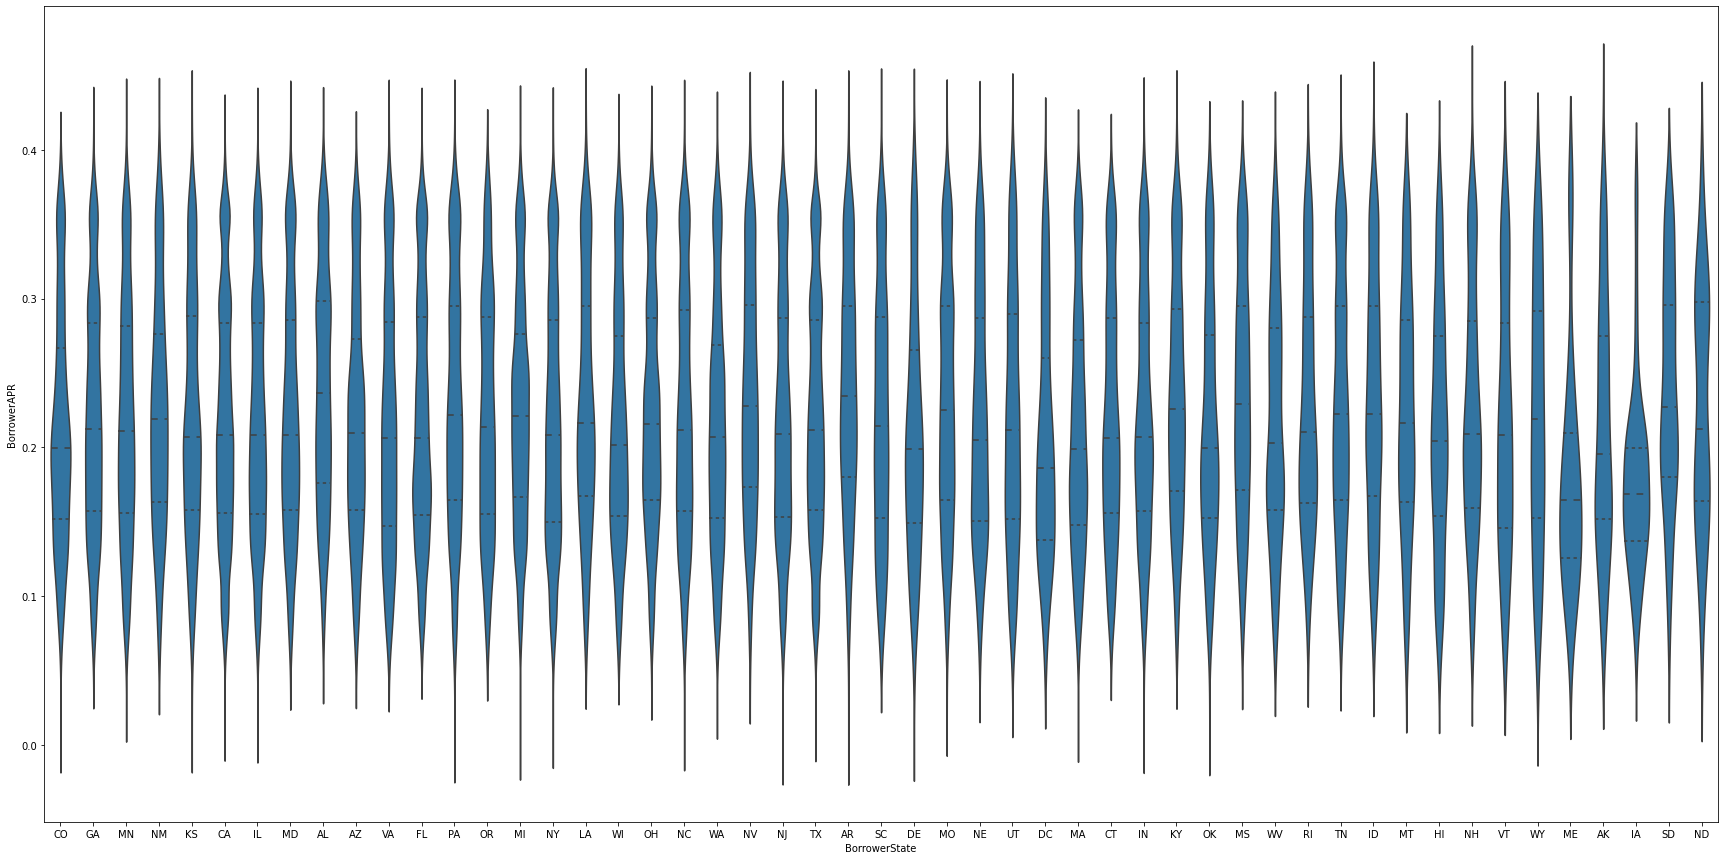

In [125]:
color = sns.color_palette()[0]
plt.figure(figsize = (30, 15));
sns.violinplot(data=prosperLoanData, x='BorrowerState', y='BorrowerAPR', inner='quartile', color=color);

Per each`BorrowerState`, the `BorrowerAPR` are slightly the same. There is not much difference of `BorrowerAPR` according to differents `BorrowerState`.